## QuickLook at BOSS Spectra Meta Data

This notebook takes a look at the distribution of metadata and can be used to cross check the metadata compiled in boss_meta_rich.pkl created using boss_meta_rich.py

In [1]:
%matplotlib inline
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation
from astropy.time import Time

In [2]:
meta_rich = np.load('meta_rich.npy')

In [4]:
meta_df = pd.DataFrame.from_records(meta_rich)

In [5]:
meta_df.drop_duplicates(subset=['PLATE','IMG'], keep='first', inplace = True)

In [6]:
meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

In [7]:
meta_df.columns

Index(['PLATE', 'IMG', 'TAI-BEG', 'TAI-END', 'RA', 'DEC', 'CAMERAS', 'AIRMASS',
       'ALT', 'AZ', 'EXPTIME', 'SEEING20', 'SEEING50', 'SEEING80', 'AIRTEMP',
       'DEWPOINT', 'DUSTA', 'DUSTB', 'WINDD25M', 'WINDS25M', 'GUSTD', 'GUSTS',
       'HUMIDITY', 'PRESSURE', 'WINDD', 'WINDS', 'MOON_LAT', 'MOON_LON',
       'SUN_LAT', 'SUN_LON', 'MOON_ALT', 'MOON_AZ', 'SUN_ALT', 'SUN_AZ',
       'DAYS2FULL', 'ECL_LAT', 'ECL_LON', 'GAL_LAT', 'GAL_LON', 'AZ_CALC',
       'FLI', 'SOLARFLUX', 'XFOCAL', 'YFOCAL', 'THROUGHPUT'],
      dtype='object')

In [8]:
len(np.unique(meta_df.PLATE))

2473

### Identify "GOOD" Data

In [9]:
#This txt file contains all the good plate-days
GOOD_FILE = '/global/homes/p/parkerf/BOSS_Sky/good_plates.txt' 

In [10]:
#Pull info from this file and only use critical info
good_data = pd.DataFrame.from_csv(GOOD_FILE, index_col=None, header=0)
good_info = good_data[['MJD','QUALITY','PLATE']]

In [11]:
#Need to calculate the MJD of each observation to compare with the plate-day

#location and time
APACHE = EarthLocation(lat=(32+4.6/60+49.30/3600), lon=(-105+49./60+13.50/3600.), height=2788)
def mjd_time(fits_time):
    fits_time = float(fits_time)
    tt = Time(fits_time/86400, scale='tai', format='mjd', location=APACHE)
    return tt.mjd

In [12]:
meta_df['TAI-MJD'] = meta_df['TAI-BEG'].apply(mjd_time)
meta_df['MJD'] = np.round(meta_df['TAI-MJD'])

In [13]:
good_obs = pd.merge(meta_df,good_info,on=['MJD','PLATE'],how='left')
good_meta_df = good_obs[good_obs.QUALITY == 'good']

### Look at Dark Cut

In [22]:
dark_df = good_meta_df[(good_meta_df['AIRMASS'] <= 1.4)&(good_meta_df['GAL_LAT'] > 10)&(good_meta_df['MOON_ALT'] <= -18)&(good_meta_df['ECL_LON'] >= 90)]

## Cross Check Data

In [82]:
pd.set_option('display.max_columns', None)

In [83]:
#INPUTS:
ra = 7.947569
dec = 19.996900

In [84]:
xcheck_data = meta_df[(meta_df.RA == ra) & (meta_df.DEC == dec)]

In [85]:
xcheck_data

,PLATE,IMG,TAI-BEG,RA,DEC,MOON_LAT,MOON_LON,SUN_LAT,SUN_LON,MOON_ALT,MOON_AZ,SUN_ALT,SUN_AZ,DAYS2FULL,ECL_LAT,ECL_LON,GAL_LAT,GAL_LON,AZ_CALC,FLI,SOLARFLUX,TAI-MJD,MJD
97,6187,150697,4.859499e+09,7.947569,19.9969,-0.021724,346.079315,-0.012297,280.691833,-66.381447,308.174225,-59.208748,291.117279,15.41596,15.19384,15.333151,-42.635181,116.652893,219.012589,0.29176,145.766663,56244.199687,56244.0


## Distribution of Data

In [23]:
def plot_hist(name):
    meta_df[name].plot.hist(bins=100)
    good_meta_df[name].plot.hist(bins=100)
    dark_df[name].plot.hist(bins=100)
    plt.title(name)

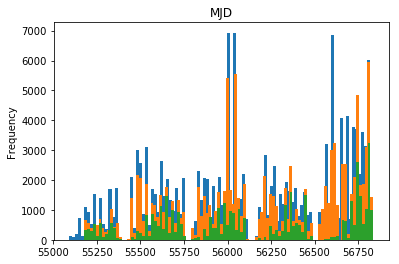

In [24]:
plot_hist('MJD')

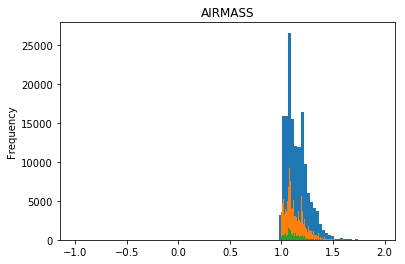

In [25]:
plot_hist('AIRMASS')

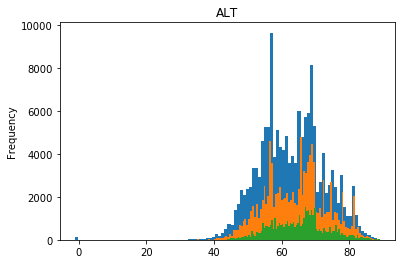

In [26]:
plot_hist('ALT')

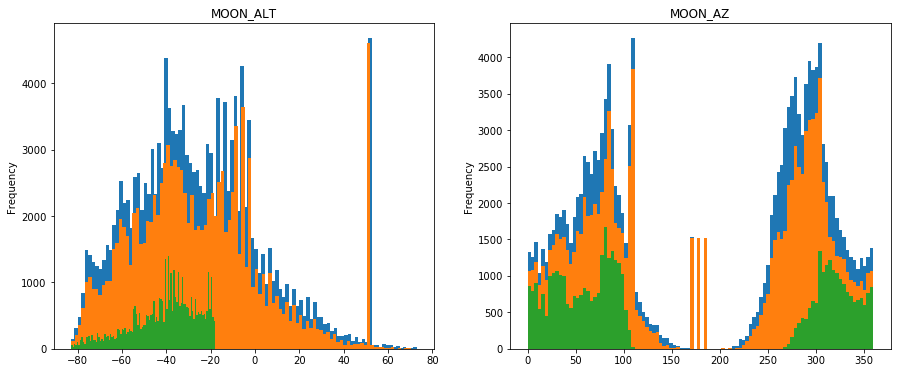

In [27]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('MOON_ALT')
plt.subplot(1,2,2)
plot_hist('MOON_AZ')

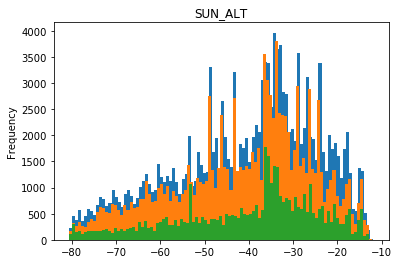

In [28]:
plot_hist('SUN_ALT')

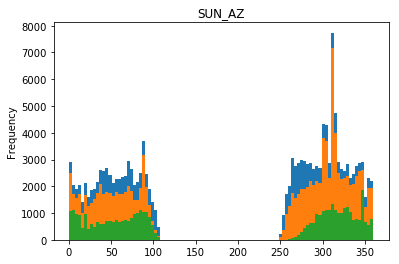

In [29]:
plot_hist('SUN_AZ')

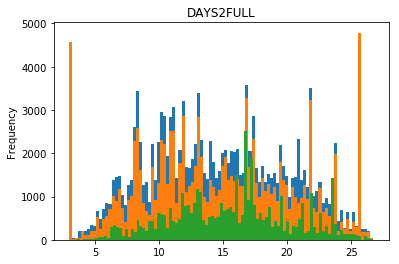

In [30]:
plot_hist('DAYS2FULL')

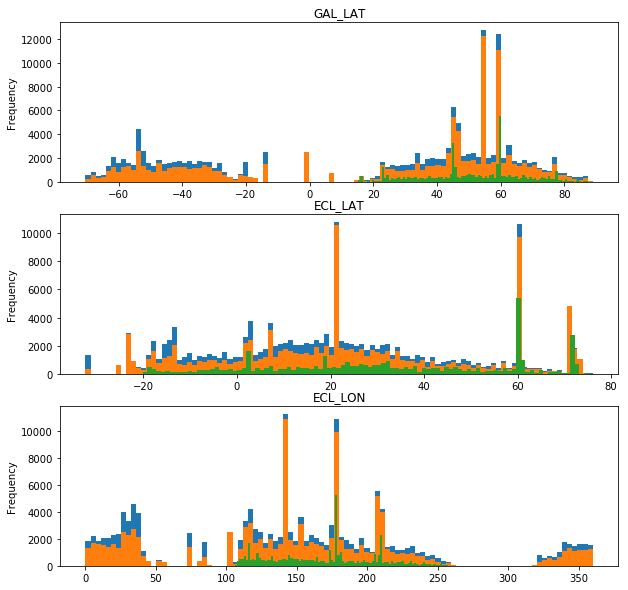

In [31]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plot_hist("GAL_LAT")
plt.subplot(3,1,2)
plot_hist('ECL_LAT')
plt.subplot(3,1,3)
plot_hist('ECL_LON')

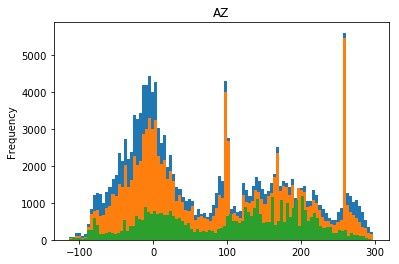

In [32]:
plot_hist('AZ')

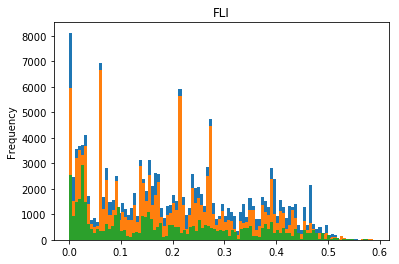

In [33]:
plot_hist('FLI')

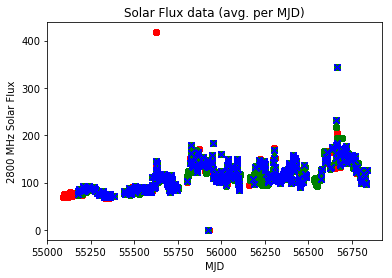

In [37]:
plt.plot(meta_df.MJD, meta_df.SOLARFLUX,'ro')
plt.plot(good_meta_df.MJD,good_meta_df.SOLARFLUX,'go')
plt.plot(dark_df.MJD,dark_df.SOLARFLUX,'bx')
plt.title("Solar Flux data (avg. per MJD)")
plt.xlabel("MJD")
plt.ylabel("2800 MHz Solar Flux")

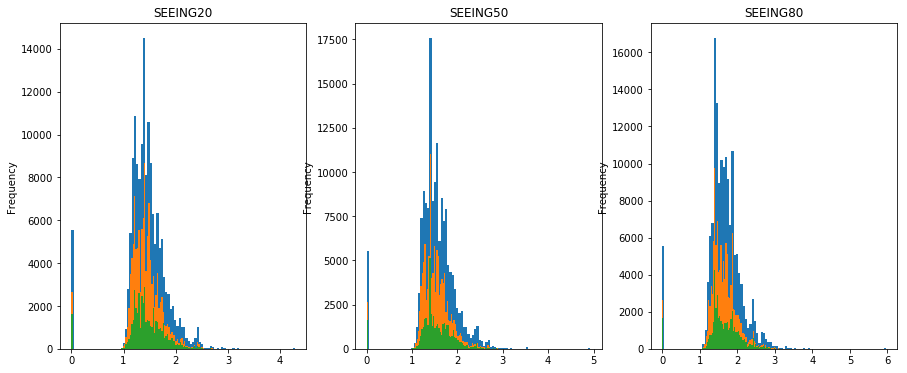

In [36]:
plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
plot_hist('SEEING20')
plt.subplot(1,3,2)
plot_hist('SEEING50')
plt.subplot(1,3,3)
plot_hist('SEEING80')

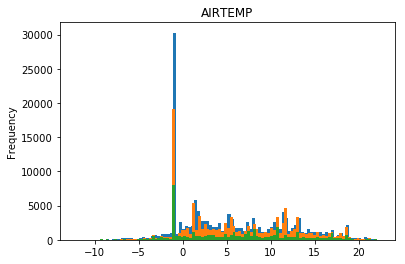

In [38]:
plot_hist('AIRTEMP')

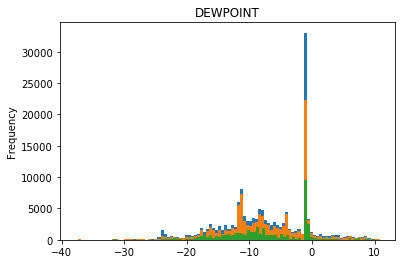

In [39]:
plot_hist('DEWPOINT')

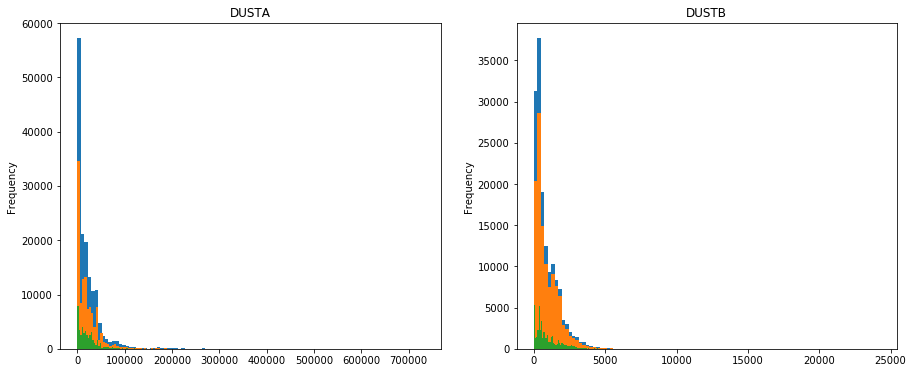

In [40]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('DUSTA')
plt.subplot(1,2,2)
plot_hist('DUSTB')

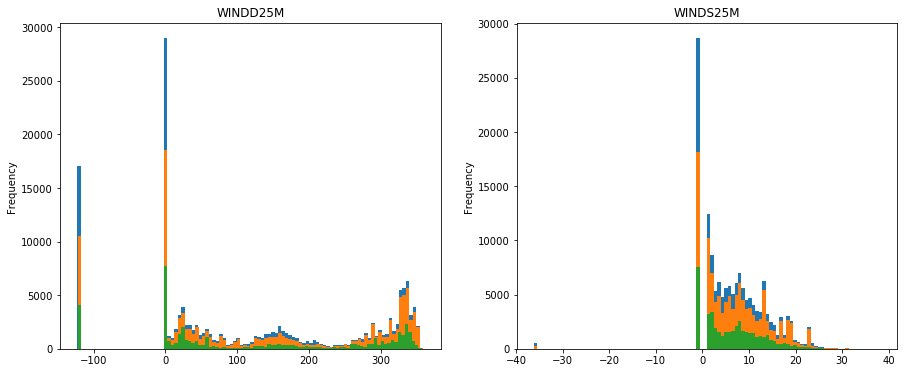

In [41]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('WINDD25M')
plt.subplot(1,2,2)
plot_hist('WINDS25M')

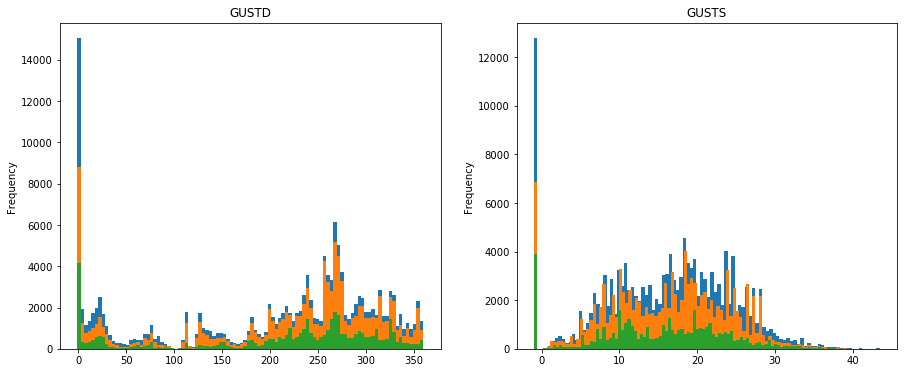

In [42]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('GUSTD')
plt.subplot(1,2,2)
plot_hist('GUSTS')

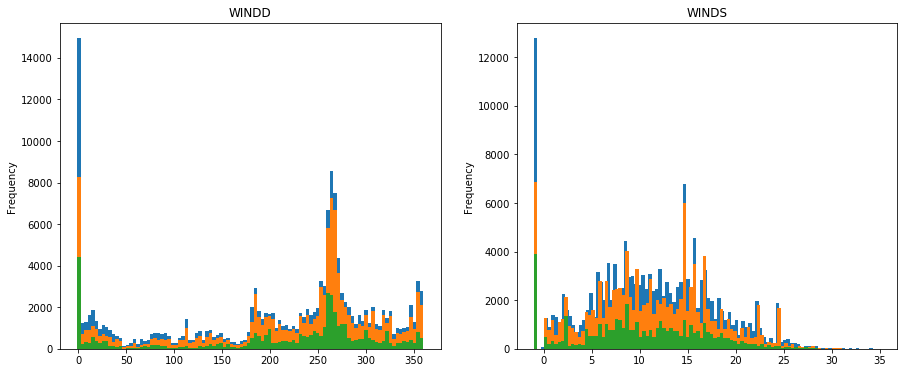

In [43]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('WINDD')
plt.subplot(1,2,2)
plot_hist('WINDS')

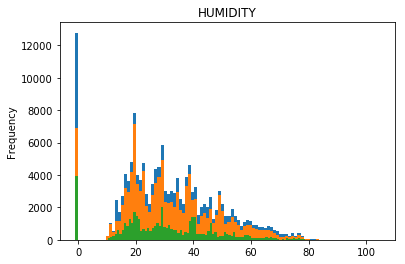

In [44]:
plot_hist('HUMIDITY')

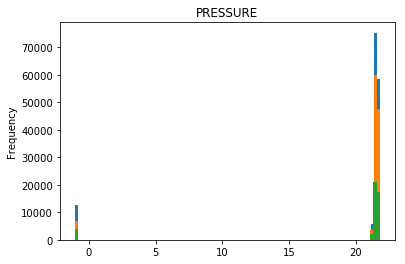

In [45]:
plot_hist('PRESSURE')

### Look at location of sky fibers on plate

In [39]:
def focal_rad(x,y):
    r = np.sqrt(x**2+y**2)
    return r

In [40]:
X = meta_df['XFOCAL']
Y = meta_df['YFOCAL']

In [41]:
r=[]
for i, x in enumerate(X):
    r.append(focal_rad(x,Y[i]))

In [42]:
meta_df['RFOCAL'] = r

In [43]:
meta_df['THROUGHPUT'] = meta_df['THROUGHPUT']/65535.

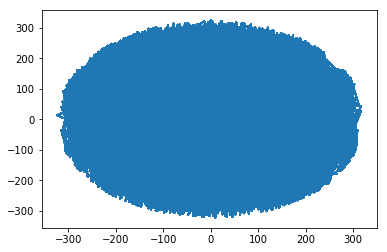

In [68]:
plt.plot(X,Y)